# Comparison of Three ResNet Models

In [1]:
#Import the necessary packages
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.models import resnet50
from torchvision import transforms
from tqdm import tqdm
from torch import nn
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import seaborn as sns
from imutils import paths
import numpy as np
import shutil
import torch
import time
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [4]:
#Specify ImageNet mean and standard deviation and image size
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
IMAGE_SIZE = 224

PRED_BATCH_SIZE = 4

# determine the device to be used for training and evaluation
DEVICE = get_default_device()

# test dataset path
TEST_DS_PATH = '/content/drive/MyDrive/ML_Project2022/dataset/test'

MODEL_V1_PATH = '/content/drive/MyDrive/ML_Project2022/models/ResNet_Ver1.pth'
HISTORY_V1_PATH = '/content/drive/MyDrive/ML_Project2022/history/ResNet_Ver1.pt'
STATE_V1_PATH = '/content/drive/MyDrive/ML_Project2022/state/ResNet_Ver1.pt'

MODEL_V2_PATH = '/content/drive/MyDrive/ML_Project2022/models/ResNet_Ver2.pth'
HISTORY_V2_PATH = '/content/drive/MyDrive/ML_Project2022/history/ResNet_Ver2.pt'
STATE_V2_PATH = '/content/drive/MyDrive/ML_Project2022/state/ResNet_Ver2.pt'

MODEL_V3_PATH = '/content/drive/MyDrive/ML_Project2022/models/ResNet_Ver3.pth'
HISTORY_V3_PATH = '/content/drive/MyDrive/ML_Project2022/history/ResNet_Ver3.pt'
STATE_V3_PATH = '/content/drive/MyDrive/ML_Project2022/state/ResNet_Ver3.pt'

## 1. Loss Comparison

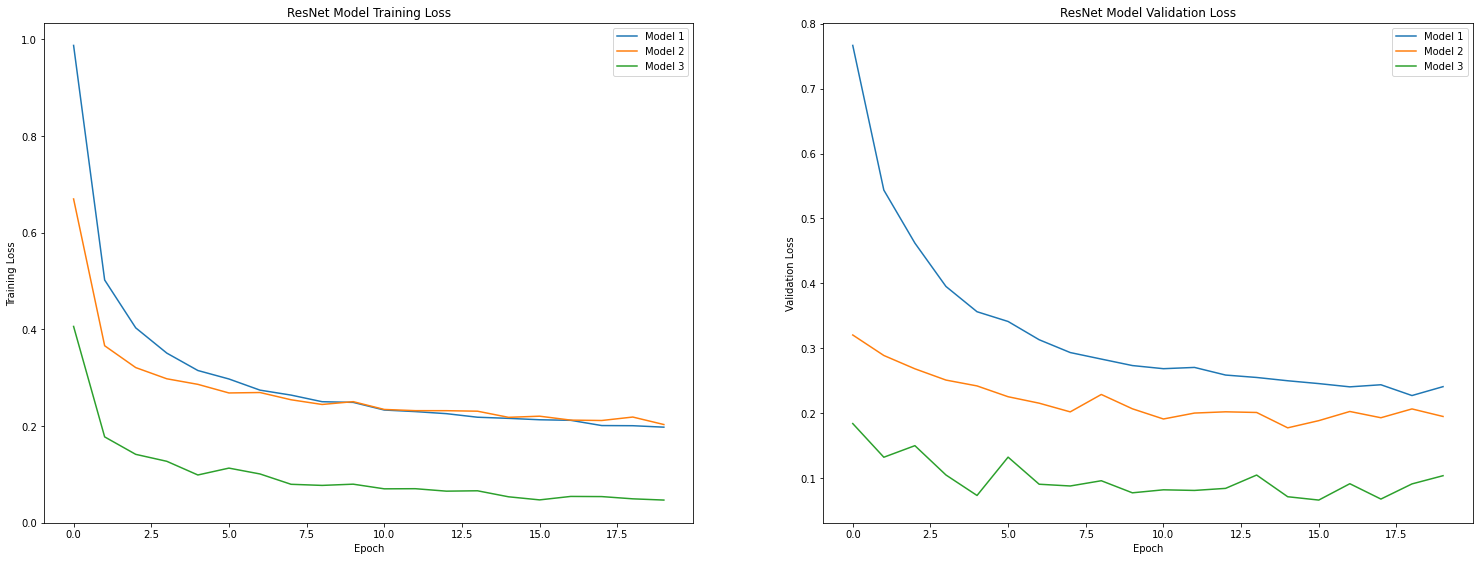

In [5]:
resnet_v1_history = torch.load(HISTORY_V1_PATH)
resnet_v2_history = torch.load(HISTORY_V2_PATH)
resnet_v3_history = torch.load(HISTORY_V3_PATH)

train_loss_v1 = resnet_v1_history['avg_train_losses_per_epoch']
train_loss_v2 = resnet_v2_history['avg_train_losses_per_epoch']
train_loss_v3 = resnet_v3_history['avg_train_losses_per_epoch']

fig, axs = plt.subplots(1, 2, figsize=(25.6, 9.2))
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)

plt1.plot(train_loss_v1, label='Model 1')
plt1.plot(train_loss_v2, label='Model 2')
plt1.plot(train_loss_v3, label='Model 3')
plt1.set_xlabel("Epoch")
plt1.set_ylabel("Training Loss")
plt1.set_title('ResNet Model Training Loss')
plt1.legend()


resnet_v1_history = torch.load(HISTORY_V1_PATH)
resnet_v2_history = torch.load(HISTORY_V2_PATH)
resnet_v3_history = torch.load(HISTORY_V3_PATH)

val_loss_v1 = resnet_v1_history['avg_val_losses_per_epoch']
val_loss_v2 = resnet_v2_history['avg_val_losses_per_epoch']
val_loss_v3 = resnet_v3_history['avg_val_losses_per_epoch']

plt2.plot(val_loss_v1, label='Model 1')
plt2.plot(val_loss_v2, label='Model 2')
plt2.plot(val_loss_v3, label='Model 3')
plt2.set_xlabel("Epoch")
plt2.set_ylabel("Validation Loss")
plt2.set_title('ResNet Model Validation Loss')
plt2.legend()


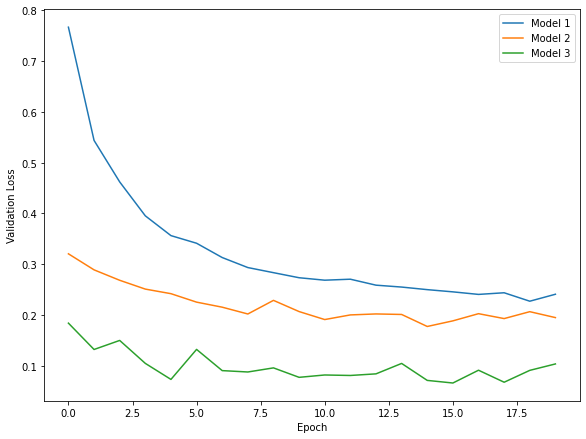

In [6]:
val_loss_v1 = resnet_v1_history['avg_val_losses_per_epoch']
val_loss_v2 = resnet_v2_history['avg_val_losses_per_epoch']
val_loss_v3 = resnet_v3_history['avg_val_losses_per_epoch']

fig1 = plt.figure(figsize=(9.6,7.2))
plt.plot(val_loss_v1)
plt.plot(val_loss_v2)
plt.plot(val_loss_v3)
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend(["Model 1", "Model 2", "Model 3"])

## 2. Accuracy Comparison

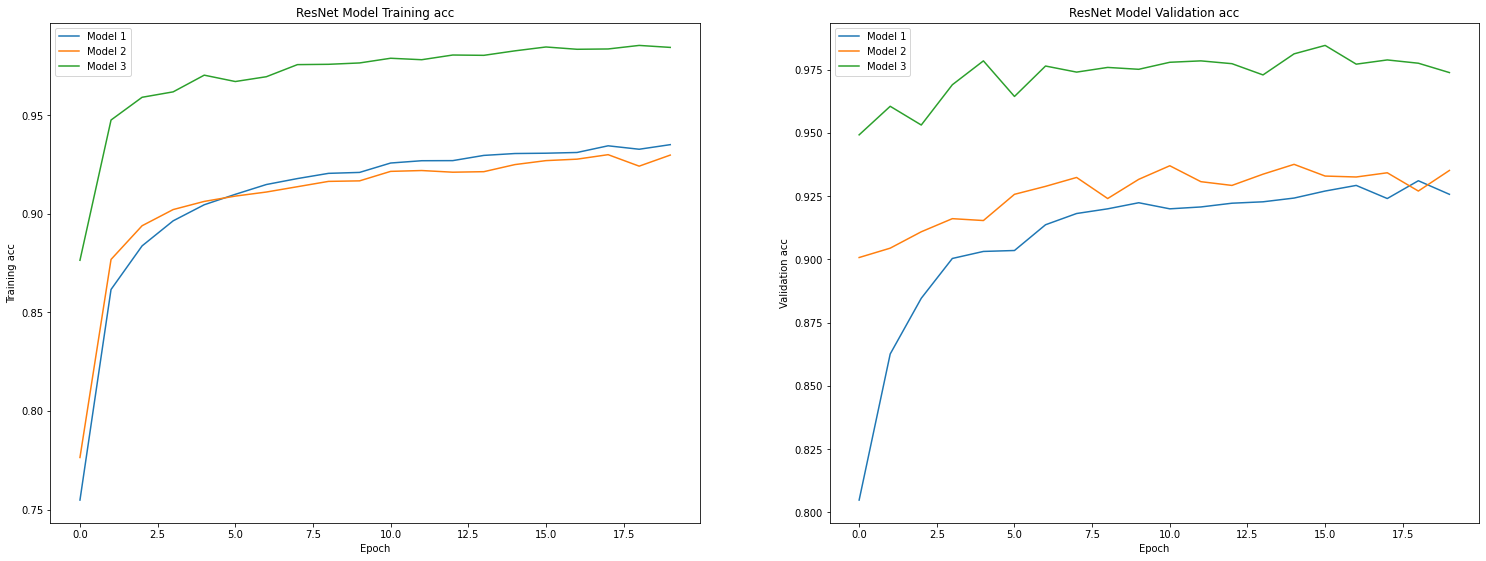

In [7]:
train_acc_v1 = resnet_v1_history['avg_train_accs_per_epoch']
train_acc_v2 = resnet_v2_history['avg_train_accs_per_epoch']
train_acc_v3 = resnet_v3_history['avg_train_accs_per_epoch']

fig, axs = plt.subplots(1, 2, figsize=(25.6, 9.2))
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)

plt1.plot(train_acc_v1, label='Model 1')
plt1.plot(train_acc_v2, label='Model 2')
plt1.plot(train_acc_v3, label='Model 3')
plt1.set_xlabel("Epoch")
plt1.set_ylabel("Training acc")
plt1.set_title('ResNet Model Training acc')
plt1.legend()


resnet_v1_history = torch.load(HISTORY_V1_PATH)
resnet_v2_history = torch.load(HISTORY_V2_PATH)
resnet_v3_history = torch.load(HISTORY_V3_PATH)

val_acc_v1 = resnet_v1_history['avg_val_accs_per_epoch']
val_acc_v2 = resnet_v2_history['avg_val_accs_per_epoch']
val_acc_v3 = resnet_v3_history['avg_val_accs_per_epoch']

plt2.plot(val_acc_v1, label='Model 1')
plt2.plot(val_acc_v2, label='Model 2')
plt2.plot(val_acc_v3, label='Model 3')
plt2.set_xlabel("Epoch")
plt2.set_ylabel("Validation acc")
plt2.set_title('ResNet Model Validation acc')
plt2.legend()

In [8]:
def get_default_device():
  if torch.cuda.is_available():
      return torch.device('cuda')
  else:
      return torch.device('cpu')

# determine the device to be used for training and evaluation
DEVICE = get_default_device()

In [9]:
DEVICE

device(type='cuda')

In [10]:
checkpoint1 = torch.load(STATE_V1_PATH)
checkpoint2 = torch.load(STATE_V2_PATH)
checkpoint3 = torch.load(STATE_V3_PATH)

model1 = torch.load(MODEL_V1_PATH)
model2 = torch.load(MODEL_V2_PATH)
model3 = torch.load(MODEL_V3_PATH)

model1.load_state_dict(checkpoint1['model_state_dict'])
model2.load_state_dict(checkpoint2['model_state_dict'])
model3.load_state_dict(checkpoint3['model_state_dict'])

model1.eval()
model2.eval()
model3.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
def testModel(model, dataLoader):
  with torch.no_grad():
      correct = 0
      acc     = 0
      total   = 0
      allPrediction       = []
      correctLabels       = []
      misclassifiedLabels = []
      
      for images, targets in dataLoader:
          images  = images.to(DEVICE)
          targets = targets.to(DEVICE)                  

          yhat    = model(images)
          predicted = torch.max(yhat, 1)[1] 
          batch_corr = (predicted == targets).sum()
          correct   += batch_corr
          total     += targets.shape[0]
          
          for i in range(len(predicted)):
              if predicted[i] != targets[i]:
                  misclassifiedLabels.append({
                      'correctLabel': targets[i],
                      'predicted': predicted[i],
                      'image': images[i]
                  })

          allPrediction.append(predicted)
          correctLabels.append(targets)

      acc = 100 * correct / total
      print(f"Accuracy: {acc:.2f}")
      
      return allPrediction, correctLabels, misclassifiedLabels

In [12]:
def get_dataloader(rootDir, transforms, batchSize, shuffle=True):
    # create a dataset and use it to create a data loader
    ds = datasets.ImageFolder(root=rootDir,
            transform=transforms)
    loader = DataLoader(ds, batch_size=batchSize,
            shuffle=shuffle,
            num_workers=os.cpu_count(),
            pin_memory=True if DEVICE.type == 'cuda' else False)

    # return a tuple of  the dataset and the data loader
    return (ds, loader)

In [13]:
testTransform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=MEAN, std=STD)
])

(testDS, testLoader) = get_dataloader(TEST_DS_PATH,
                                    transforms=testTransform, 
                                    batchSize=
                                    PRED_BATCH_SIZE, 
                                    shuffle=False)

In [14]:
allPrediction1, correctLabels1, misclassifiedLabels1 = testModel(model1,testLoader)

Accuracy: 91.33


In [15]:
allPrediction2, correctLabels2, misclassifiedLabels2 = testModel(model2,testLoader)

Accuracy: 93.37


In [16]:
allPrediction3, correctLabels3, misclassifiedLabels3 = testModel(model3,testLoader)

Accuracy: 96.96


## 3. Display Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

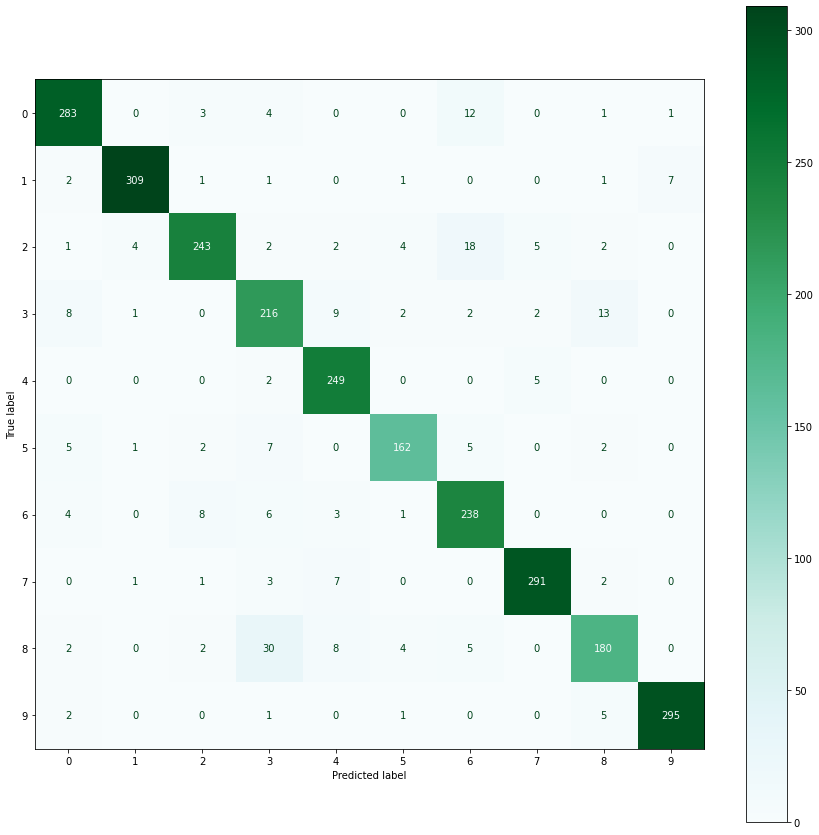

In [18]:
allPredictionTensor1 = allPrediction1[0]
correctLabelsTensor1 = correctLabels1[0]

for i in range(1, len(allPrediction1)):
    allPredictionTensor1 = torch.cat((allPredictionTensor1, allPrediction1[i]))
    
for i in range(1, len(correctLabels1)):
    correctLabelsTensor1 = torch.cat((correctLabelsTensor1, correctLabels1[i]))

confusion_matrix_report1 = confusion_matrix(correctLabelsTensor1.cpu(), allPredictionTensor1.cpu())
disp = ConfusionMatrixDisplay(confusion_matrix_report1)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax, cmap='BuGn')

In [19]:
class_label_dict = testDS.class_to_idx
classNames = list(class_label_dict.keys())
val_list = list(class_label_dict.values())

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

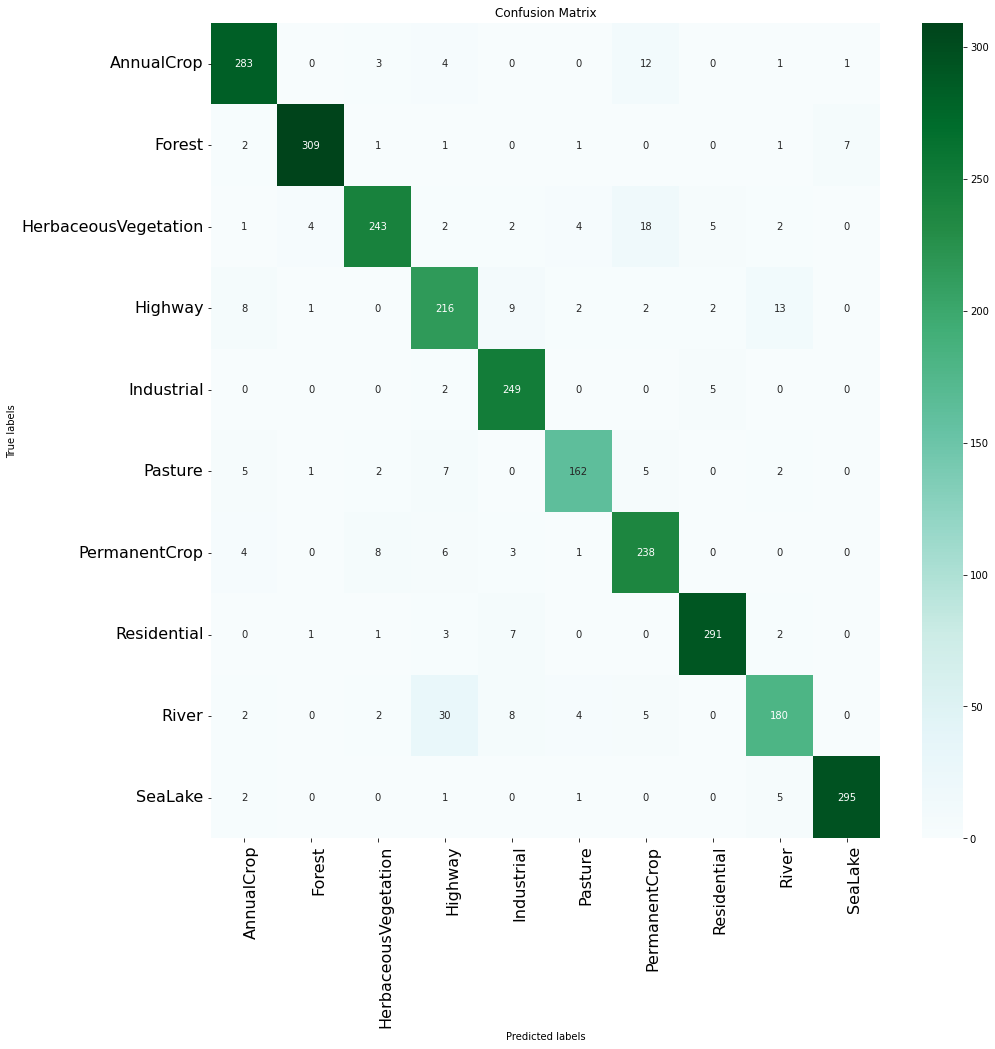

In [20]:
confusion_matrix_report1 = confusion_matrix(correctLabelsTensor1.cpu(), allPredictionTensor1.cpu())
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(confusion_matrix_report1, annot=True, fmt='g', ax=ax, cmap='BuGn')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(classNames)
ax.yaxis.set_ticklabels(classNames)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor", fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor", fontsize=16)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

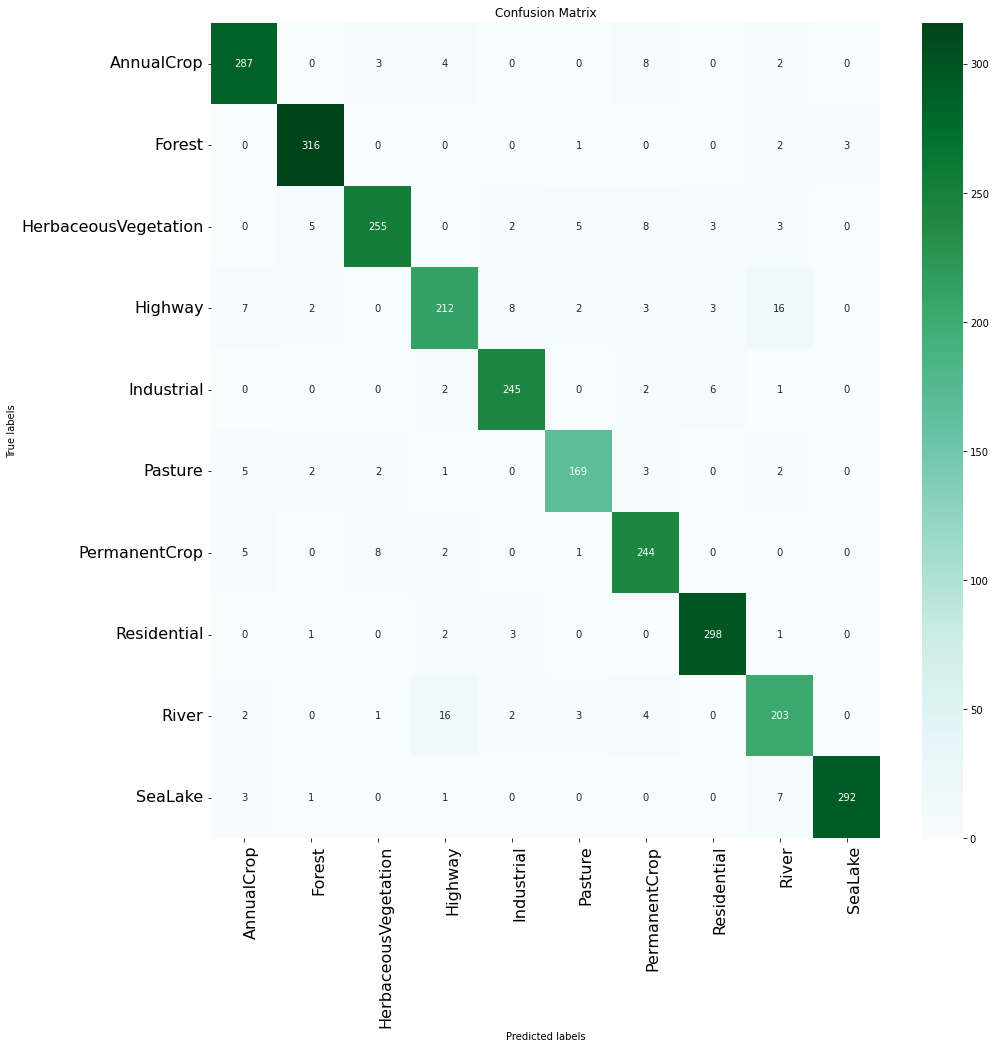

In [21]:
allPredictionTensor2 = allPrediction2[0]
correctLabelsTensor2 = correctLabels2[0]

for i in range(1, len(allPrediction2)):
    allPredictionTensor2 = torch.cat((allPredictionTensor2, allPrediction2[i]))
    
for i in range(1, len(correctLabels2)):
    correctLabelsTensor2 = torch.cat((correctLabelsTensor2, correctLabels2[i]))

confusion_matrix_report2 = confusion_matrix(correctLabelsTensor2.cpu(), allPredictionTensor2.cpu())
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(confusion_matrix_report2, annot=True, fmt='g', ax=ax, cmap='BuGn')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(classNames)
ax.yaxis.set_ticklabels(classNames)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor", fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor", fontsize=16)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

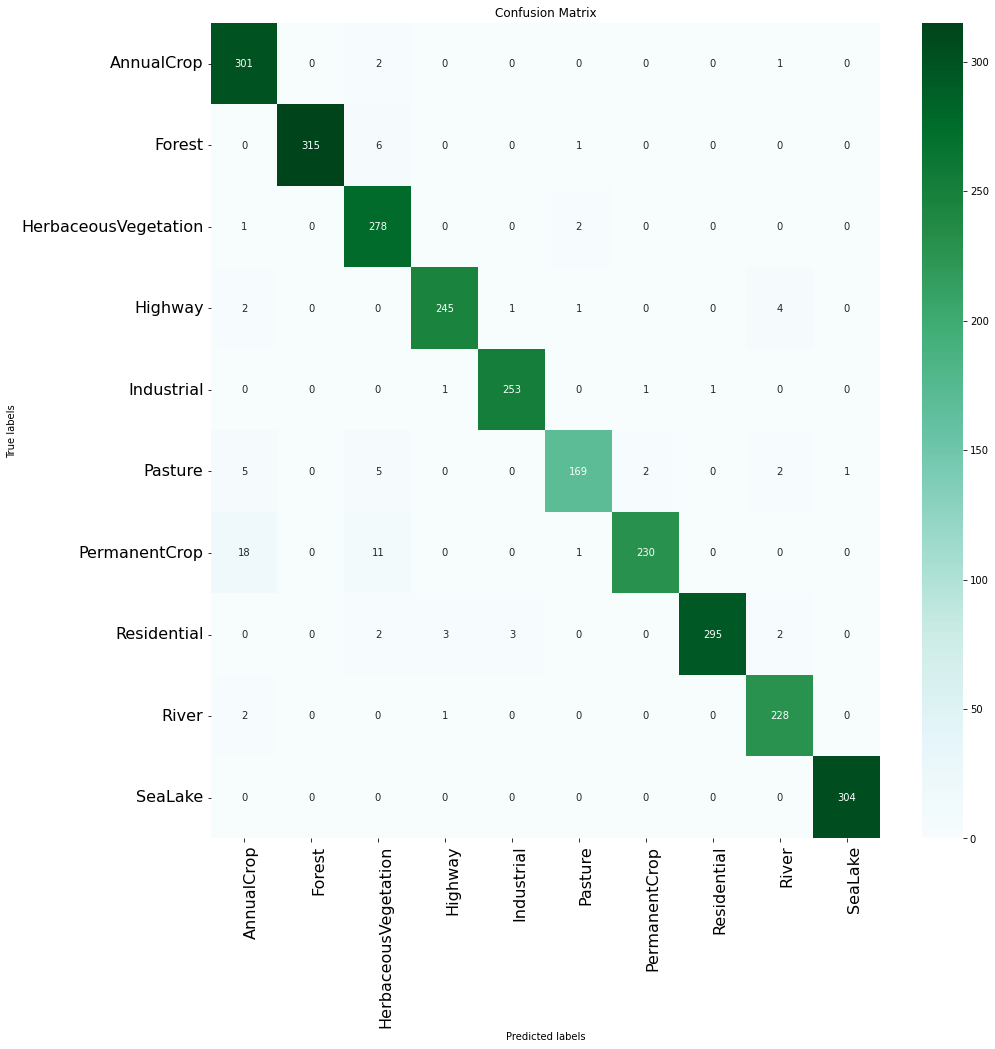

In [22]:
allPredictionTensor3 = allPrediction3[0]
correctLabelsTensor3 = correctLabels3[0]

for i in range(1, len(allPrediction3)):
    allPredictionTensor3 = torch.cat((allPredictionTensor3, allPrediction3[i]))
    
for i in range(1, len(correctLabels3)):
    correctLabelsTensor3 = torch.cat((correctLabelsTensor3, correctLabels3[i]))

confusion_matrix_report3 = confusion_matrix(correctLabelsTensor3.cpu(), allPredictionTensor3.cpu())
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(confusion_matrix_report3, annot=True, fmt='g', ax=ax, cmap='BuGn')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(classNames)
ax.yaxis.set_ticklabels(classNames)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor", fontsize=16)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",rotation_mode="anchor", fontsize=16)

## 4. Examin Misclassified Images

In [23]:
def count_misclassified_images_per_label(confusion_matrix_report):
    total_number_misclassified_labels = []
    misclassified_labels_percentage   = []
    for i in range(len(confusion_matrix_report)):
        total_label_misclassified = sum(confusion_matrix_report[i][:i]) + sum(confusion_matrix_report[i][i + 1:])
        total_number_misclassified_labels.append(total_label_misclassified)
        
        total_no_of_label            = sum(confusion_matrix_report[i])
        label_classfication_accuracy = 100 * confusion_matrix_report[i][i] / total_no_of_label
        misclassified_labels_percentage.append(label_classfication_accuracy)
    return total_number_misclassified_labels, misclassified_labels_percentage

In [24]:
def top_misclassified_predicted_labels(confusion_matrix_report, labels):
    top_three_misclassifications_per_label = {}
    for label in labels:
        sorted_indices       = np.argsort(confusion_matrix_report[label])
        top_three_mislabeled = np.argsort(confusion_matrix_report[label])[-4:-1]
        
        top_three_misclassifications_per_label[label] = top_three_mislabeled
    
    return top_three_misclassifications_per_label

In [25]:
def plot_misclassified_images_per_labels(misclassified_images_per_labels, label_prediction_accuracy, title1, title2, labels):
    plt.figure(figsize=(12,6))
    plt.bar(labels, misclassified_images_per_labels)
    plt.xlabel("Labels")
    plt.ylabel("No of Missclassifications")
    plt.title(title1)
    plt.xticks(rotation = 90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.bar(labels, label_prediction_accuracy)
    plt.xlabel("Labels")
    plt.ylabel("Prediction Accuracy")
    plt.title(title2)
    plt.xticks(rotation = 90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [26]:
# calculate the inverse mean and standard deviation
invMean = [-m/s for (m, s) in zip(MEAN, STD)]
invStd = [1/s for s in STD]

# define our de-normalization transform
#deNormalize = transforms.Normalize(mean=invMean, std=invStd)

deNormalize = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.Normalize(mean=invMean, std=invStd)
])

In [27]:
def show_misclassified_images_per_labels(label, top_3_mislabeled, misclassifiedLabels):
    if label not in top_3_mislabeled:
        print("Please choose one of top three misclassified labels")
        return
    
    count = 0
    images = torch.tensor([])
    for Images, targets in testLoader:
        for i in range(len(targets)):
            if targets[i] == label and count < 12:
                image = torch.tensor(Images[i]).cpu().reshape(1, 3, 224, 224)
                image = deNormalize(image)
                images = torch.cat((images, image))
                count += 1
        if count == 6:
            break
            
    grid = make_grid(images, nrow = 6, padding=1, pad_value=0.5)
    #grid = grid / 2 + 0.5 # unnormalize image
    im_transpose = np.transpose(grid, (1, 2, 0))
    plt.figure(figsize=(16, 16))
    plt.title(f"Correct Label: {label} {classNames[label]}")
    plt.imshow(im_transpose)

    for incorrect_label in reversed(top_3_mislabeled[label]):
        images = torch.tensor([])
        count = 0
        for misclassifiedLabel in misclassifiedLabels:
            if misclassifiedLabel['correctLabel'] == incorrect_label:
                #image = torch.tensor(misclassifiedLabel['image']).cpu().reshape(1, 3, 64, 64)
                image = torch.tensor(misclassifiedLabel['image']).cpu().reshape(1, 3, 224, 224)
                image = deNormalize(image)
                images = torch.cat((images, image))
                count += 1

            if count == 6:
                break
        
        grid = make_grid(images, nrow = 6, padding=1, pad_value=0.5)
        #grid = grid / 2 + 0.5 # unnormalize image
        im_transpose = np.transpose(grid, (1, 2, 0))
        plt.figure(figsize=(16, 16))
        plt.title(f"Misclassified Label: {incorrect_label} {classNames[incorrect_label]}")
        plt.imshow(im_transpose)

In [28]:
def list_top_3_mislabeled_count(low_accuracy_labels, top_3_mislabeled, confusion_matrix_report):
    for label in low_accuracy_labels:
        print(f"For label {label}, {classNames[label]}, top three misclassified labels are:")
        for mislabeled in reversed(top_3_mislabeled[label]):
            mislabeled_count = confusion_matrix_report[label][mislabeled]
            print(f"---> Mislabeled: {mislabeled} {classNames[mislabeled]}")
            print("Count:", mislabeled_count)
        print("")

In [29]:
def show_misclassified_images(misclassifiedLabels):
    misses         = torch.tensor([])
    correctLabels   = torch.tensor([])
    images = torch.Tensor([])
    
    for i in range(12):
        miss = torch.tensor(misclassifiedLabels[i]['correctLabel']).cpu().reshape(1)
        misses = torch.cat((misses, miss)).to(torch.float)
        
        correctLabel = torch.tensor(misclassifiedLabels[i]['predicted']).cpu().reshape(1)
        correctLabels = torch.cat((correctLabels, correctLabel)).to(torch.float)
        
        #image = torch.tensor(misclassifiedLabels[i]['image']).cpu().reshape(1, 3, 64, 64)
        image = torch.tensor(misclassifiedLabels[i]['image']).cpu().reshape(1, 3, 224, 224)
        image = deNormalize(image)
        images = torch.cat((images, image))
        
    print("Correct Labels:  ", correctLabels)
    print("Predicted Labels:", misses, end="\n\n")
    
    grid = make_grid(images, nrow = 6, padding=1, pad_value=0.5)
    #grid = grid / 2 + 0.5 # unnormalize image
    im_transpose = np.transpose(grid, (1, 2, 0)) 
    plt.figure(figsize=(16, 16))
    plt.imshow(im_transpose)
    
    for i in range(len(correctLabels)):
        print(f"Correct Label: {correctLabels[i]} --> {classNames[correctLabels[i].to(dtype=torch.long, device=DEVICE)]}")
        print(f"Predicted Label: {misses[i]} --> {classNames[misses[i].to(dtype=torch.long, device=DEVICE)]}", end="\n\n")

<ipython-input-29-4167fa64826c>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  miss = torch.tensor(misclassifiedLabels[i]['correctLabel']).cpu().reshape(1)
<ipython-input-29-4167fa64826c>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  correctLabel = torch.tensor(misclassifiedLabels[i]['predicted']).cpu().reshape(1)
<ipython-input-29-4167fa64826c>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(misclassifiedLabels[i]['image']).cpu().reshape(1, 3, 224, 224)


Correct Labels:   tensor([2., 2., 8., 2., 2., 5., 2., 2., 2., 2., 5., 0.])
Predicted Labels: tensor([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 2.])

Correct Label: 2.0 --> HerbaceousVegetation
Predicted Label: 0.0 --> AnnualCrop

Correct Label: 2.0 --> HerbaceousVegetation
Predicted Label: 0.0 --> AnnualCrop

Correct Label: 8.0 --> River
Predicted Label: 0.0 --> AnnualCrop

Correct Label: 2.0 --> HerbaceousVegetation
Predicted Label: 1.0 --> Forest

Correct Label: 2.0 --> HerbaceousVegetation
Predicted Label: 1.0 --> Forest

Correct Label: 5.0 --> Pasture
Predicted Label: 1.0 --> Forest

Correct Label: 2.0 --> HerbaceousVegetation
Predicted Label: 1.0 --> Forest

Correct Label: 2.0 --> HerbaceousVegetation
Predicted Label: 1.0 --> Forest

Correct Label: 2.0 --> HerbaceousVegetation
Predicted Label: 1.0 --> Forest

Correct Label: 2.0 --> HerbaceousVegetation
Predicted Label: 1.0 --> Forest

Correct Label: 5.0 --> Pasture
Predicted Label: 2.0 --> HerbaceousVegetation

Correct Label: 0.

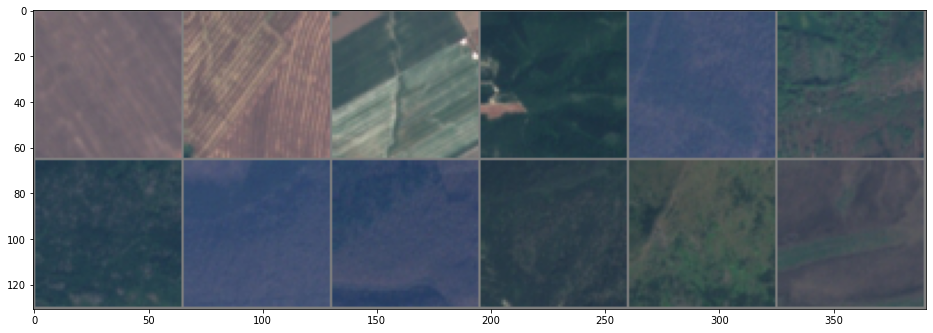

In [30]:
show_misclassified_images(misclassifiedLabels3)

In [31]:
print("Total Misclassified Images:", len(misclassifiedLabels3))

Total Misclassified Images: 82


In [32]:
misclassified_images_per_labels3, label_prediction_accuracy3 = count_misclassified_images_per_label(confusion_matrix_report3)

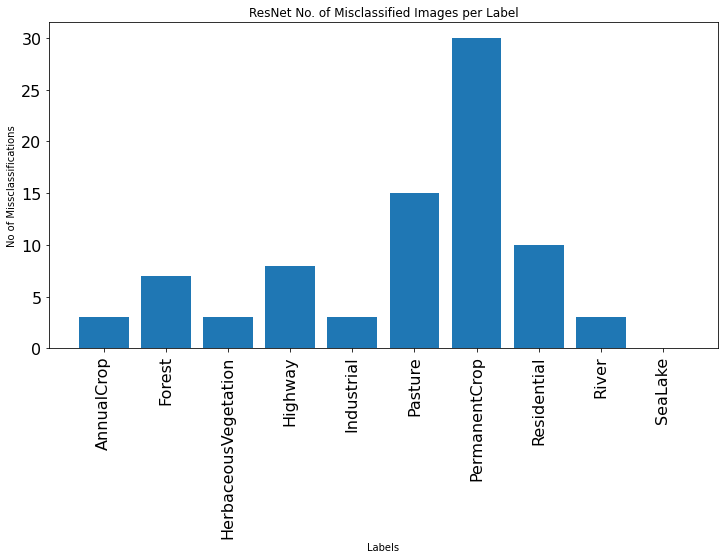

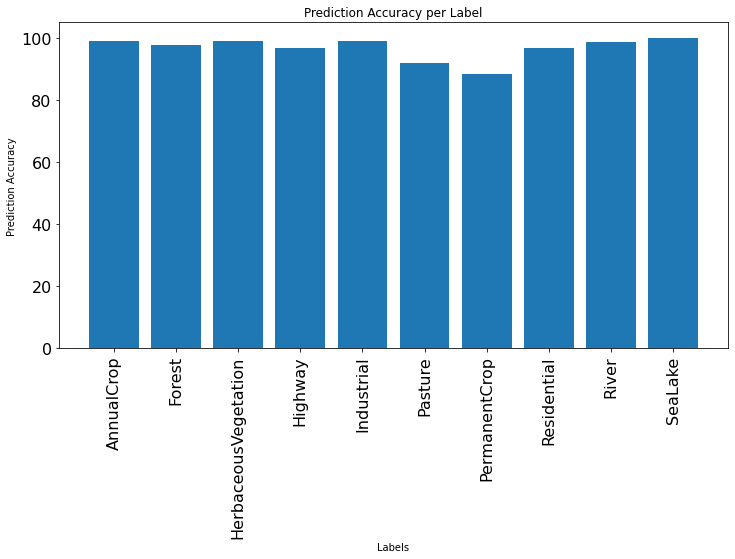

In [33]:
plot_misclassified_images_per_labels(misclassified_images_per_labels3, label_prediction_accuracy3, "ResNet No. of Misclassified Images per Label",
                                     "Prediction Accuracy per Label", classNames)

In [34]:
low_accuracy_labels = [3, 5, 6, 7]

In [35]:
top_3_mislabeled3 = top_misclassified_predicted_labels(confusion_matrix_report3, low_accuracy_labels)

In [36]:
list_top_3_mislabeled_count(low_accuracy_labels, top_3_mislabeled3, confusion_matrix_report3)

For label 3, Highway, top three misclassified labels are:
---> Mislabeled: 8 River
Count: 4
---> Mislabeled: 0 AnnualCrop
Count: 2
---> Mislabeled: 5 Pasture
Count: 1

For label 5, Pasture, top three misclassified labels are:
---> Mislabeled: 2 HerbaceousVegetation
Count: 5
---> Mislabeled: 0 AnnualCrop
Count: 5
---> Mislabeled: 8 River
Count: 2

For label 6, PermanentCrop, top three misclassified labels are:
---> Mislabeled: 0 AnnualCrop
Count: 18
---> Mislabeled: 2 HerbaceousVegetation
Count: 11
---> Mislabeled: 5 Pasture
Count: 1

For label 7, Residential, top three misclassified labels are:
---> Mislabeled: 4 Industrial
Count: 3
---> Mislabeled: 3 Highway
Count: 3
---> Mislabeled: 8 River
Count: 2



<ipython-input-27-6d99abec7802>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(Images[i]).cpu().reshape(1, 3, 224, 224)
<ipython-input-27-6d99abec7802>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(misclassifiedLabel['image']).cpu().reshape(1, 3, 224, 224)


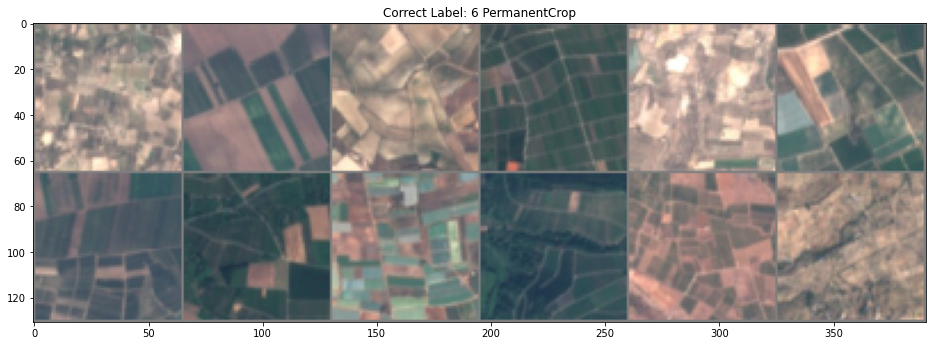

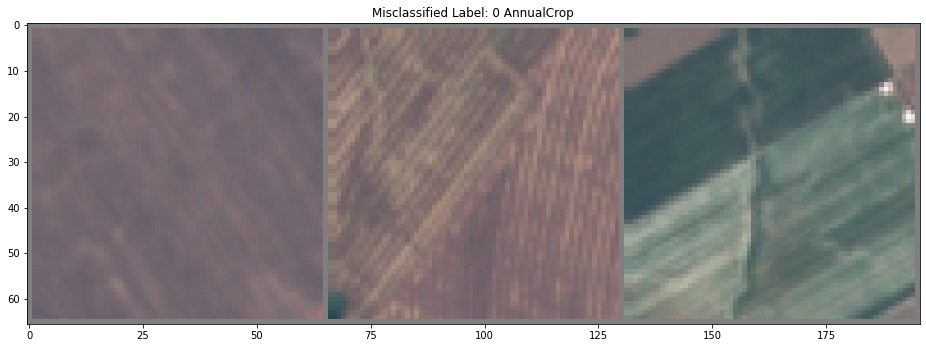

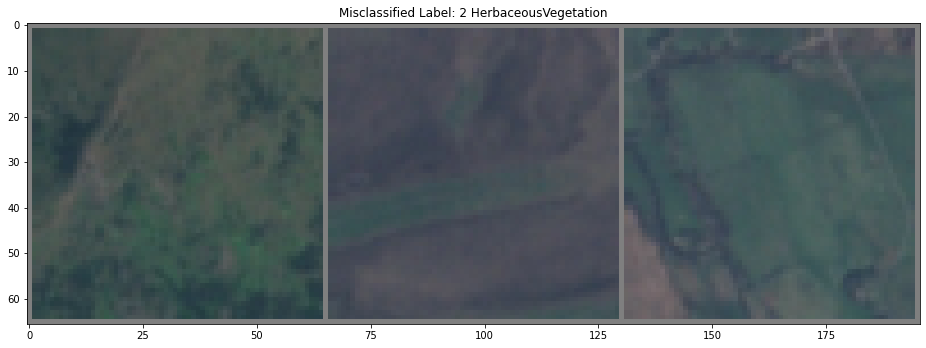

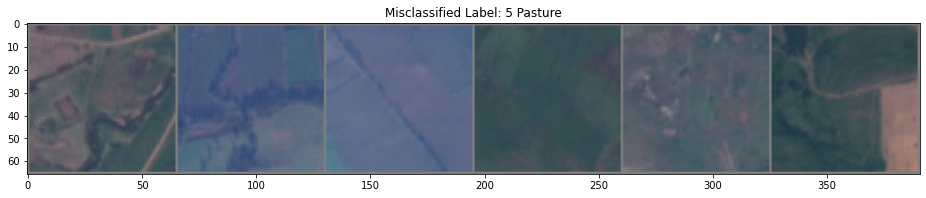

In [37]:
show_misclassified_images_per_labels(6, top_3_mislabeled3, misclassifiedLabels3)